![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/ocr/ocr_visual_document_ner.ipynb)


## Transformer-Based Document NER

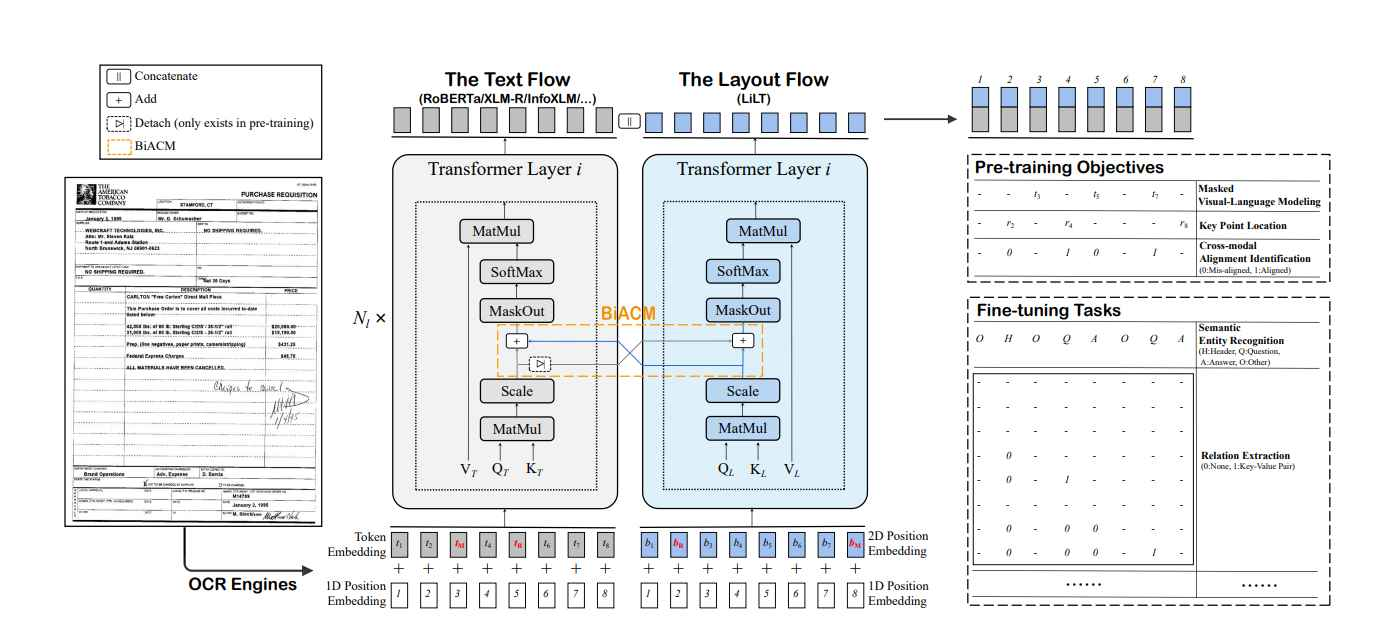

You can now extract entities from images as pandas dataframe in 1 line of code, leveraging Spark OCR's VisualDocumentNer class.

VisualDocumentNER is a transformer-based model designed for Named Entity Recognition (NER) in documents. It serves as the primary interface for tasks such as detecting keys and values in datasets like FUNSD, representing the structure of a form. These keys and values are typically interconnected using a FormRelationExtractor model.

However, some VisualDocumentNER models are trained with a different approach, considering entities in isolation. These entities could be names, places, or medications, and the goal is not to connect these entities to others, but to utilize them individually.

Powered by Spark OCR's [VisualDocumentNER](https://nlp.johnsnowlabs.com/docs/en/ocr_visual_document_understanding#visualdocumentner-1)

**language**|**nlu.load() reference**|**Spark NLP Model Reference**
:-----:|:-----:|:-----:
en|lilt\_roberta\_funsd\_v1|[LiLT model finetuned on FUNSD for Key Value Recognition](https://nlp.johnsnowlabs.com/2023/09/14/lilt_roberta_funsd_v1_en_3_2.html)


# Install NLU

In [ ]:
!pip install johnsnowlabs
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from johnsnowlabs import nlp
nlp.install(visual=True,force_browser=True)
nlp.start(visual=True)

## Named Entity Recognition

In [2]:
p = nlu.load('en.lilt_roberta_funds.v1')

lilt_roberta_funsd_v1 download started this may take some time.
Approximate size to download 419.6 MB


### Download and Display Image 🖼️

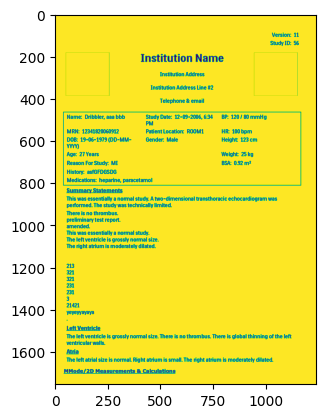

In [25]:
! wget https://raw.githubusercontent.com/JohnSnowLabs/nlu/tests/datasets/ocr/ocr_ner.png
image_path = '/content/ocr_ner.png'
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()

#### Now let's use these images and let's see what magic nlp can produce in a line 🪄

In [22]:
dfs = p.predict(image_path,output_level='chunk')
print(dfs.to_markdown())

|    |   entities_confidence | entities_ner_entity   |   entities_x_location |   entities_y_location | path                                                                |
|---:|----------------------:|:----------------------|----------------------:|----------------------:|:--------------------------------------------------------------------|
|  0 |                   106 | version               |                  1027 |                    89 | file:/F:/Work/repos/nlu_new/ner/nlu/tests/nlu_ocr_tests/ocr_ner.png |
|  0 |                    67 | :                     |                  1027 |                    89 | file:/F:/Work/repos/nlu_new/ner/nlu/tests/nlu_ocr_tests/ocr_ner.png |
|  0 |                    95 | study                 |                  1020 |                   128 | file:/F:/Work/repos/nlu_new/ner/nlu/tests/nlu_ocr_tests/ocr_ner.png |
|  0 |                    77 | id                    |                  1088 |                   128 | file:/F:/Work/repos/nlu_new/ner/

#### Now let's predict on other images 🖼️

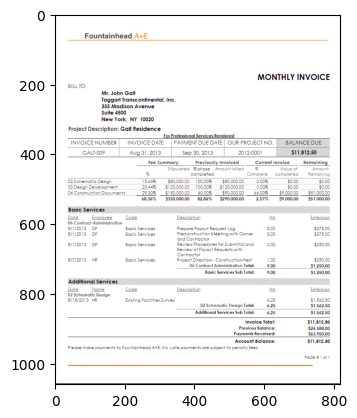

In [35]:
! wget https://raw.githubusercontent.com/JohnSnowLabs/nlu/tests/datasets/ocr/ocr_test.png
image_path = '/content/ocr_test.png'
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()

In [21]:
dfs = p.predict(image_path)
print(dfs.to_markdown())

|    |   entities_confidence | entities_ner_entity   |   entities_x_location |   entities_y_location | path                                                                 |
|---:|----------------------:|:----------------------|----------------------:|----------------------:|:---------------------------------------------------------------------|
|  0 |                    82 | selected              |                    61 |                    28 | file:/F:/Work/repos/nlu_new/ner/nlu/tests/nlu_ocr_tests/ocr_test.png |
|  0 |                    88 | balance               |                   135 |                    28 | file:/F:/Work/repos/nlu_new/ner/nlu/tests/nlu_ocr_tests/ocr_test.png |
|  0 |                    78 | sheet                 |                   202 |                    28 | file:/F:/Work/repos/nlu_new/ner/nlu/tests/nlu_ocr_tests/ocr_test.png |
|  0 |                    62 | information           |                   251 |                    28 | file:/F:/Work/repos/nlu_new

#### Or predict on an array of file paths

In [20]:
file_paths = ['ocr_test.png', 'ocr_ner.png']
for path in file_paths:
    dfs = p.predict(path, output_level='chunk')
    print(dfs.to_markdown())

|    |   entities_confidence | entities_ner_entity   |   entities_x_location |   entities_y_location | path                                                                 |
|---:|----------------------:|:----------------------|----------------------:|----------------------:|:---------------------------------------------------------------------|
|  0 |                    82 | selected              |                    61 |                    28 | file:/F:/Work/repos/nlu_new/ner/nlu/tests/nlu_ocr_tests/ocr_test.png |
|  0 |                    88 | balance               |                   135 |                    28 | file:/F:/Work/repos/nlu_new/ner/nlu/tests/nlu_ocr_tests/ocr_test.png |
|  0 |                    78 | sheet                 |                   202 |                    28 | file:/F:/Work/repos/nlu_new/ner/nlu/tests/nlu_ocr_tests/ocr_test.png |
|  0 |                    62 | information           |                   251 |                    28 | file:/F:/Work/repos/nlu_new